#ЦПТ своими руками: распределение Beta Prime
https://en.wikipedia.org/wiki/Beta_prime_distribution

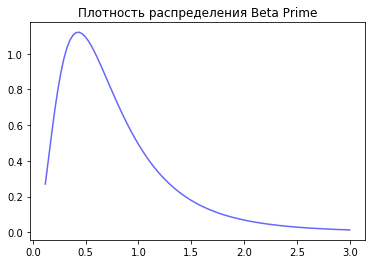

In [19]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig, ax = plt.subplots(1,1)

#параметры распределения
a = 4
b = 6

#1. генерируем ось X и рисуем график плотности для общего ознакомления
x = np.linspace(st.betaprime.ppf(0.01, a, b), st.betaprime.ppf(0.99, a, b), 100)
plt.plot(x, st.betaprime.pdf(x, a, b), 'g-', alpha=0.6)
plt.title("Плотность распределения Beta Prime")
plt.show()

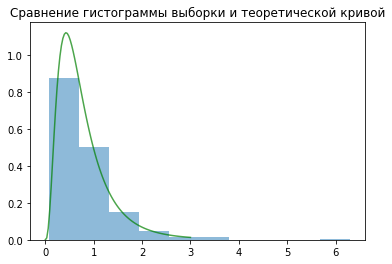

In [36]:
#2. Генерируем выборку, строим гистограмму и сравниваем с теоретической кривой
r = np.array(st.betaprime.rvs(a, b, size=1000))
x = np.linspace(0, 3.0, 100)
plt.hist(r, histtype='stepfilled',rwidth=0.5, alpha=0.5, density=True)
plt.plot(x, st.betaprime.pdf(x, a, b), 'g-', alpha=0.7)
plt.title("Сравнение гистограммы выборки и теоретической кривой")
plt.xlabel('Значение случайной величины')
plt.ylabel('Плотность вероятн')
plt.show()

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Гистограммы выборочных средних для коллекций выборок случайной величины')

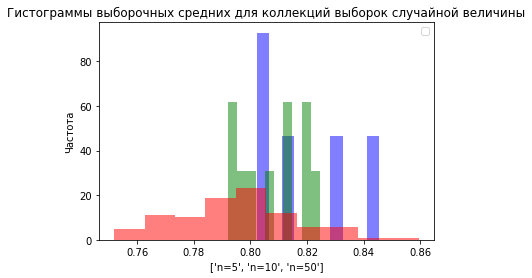

In [66]:
#3. Генерируем коллекции выборок по 1000 элементов, с n=5, n=10, n=100
# Строим гистограммы их выборочных средних
def sample_ds(): return st.betaprime.rvs(a,b,size=1000)

def ds_mean(dataset): return 1/len(dataset)*sum(dataset)

n5 = [sample_ds() for n in range(5)]
n5_hist = [ds_mean(ds) for ds in n5]
n10 = [sample_ds() for n in range(10)]
n10_hist = [ds_mean(ds) for ds in n10]
n100 = [sample_ds() for n in range(100)]
n100_hist = [ds_mean(ds) for ds in n100]

plt.hist(n5_hist,  density=True, alpha=0.5, color='blue')
plt.hist(n10_hist,  density=True, alpha=0.5,  color='green')
plt.hist(n100_hist,  density=True, alpha=0.5, color='red')
plt.xlabel('Выборочное среднее')
plt.ylabel('Частота')
plt.legend()
plt.title('Гистограммы выборочных средних для коллекций выборок случайной величины')